In [1]:
# Imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
from math import log10, floor
from sympy import *
from scipy.special import factorial
import glob
import math
import pandas as pd


x, y, z = symbols("x y z")


In [2]:
#####
# Functions
#####

def form_transient_names(filename):
    name = filename
    name = name[12:-7]
    name = 'PTF' + name
    name_PTF = name
    name = 'i' + name
    name_iPTF = name

    return name_PTF, name_iPTF

def analyze_lightcurve(filename, plot=False):
    """
    Filename: path to a .csv file
    plot: True to display a graph


    returns:
    risetime: time from halfway rising to peak
    fadetime: time from peak to halfway falling
    """
    name_PTF, name_iPTF = form_transient_names(filename)

    data = np.genfromtxt(filename, skip_header=1, skip_footer=1,usecols=(0,2,3))

    if np.size(data) < 5:
        return -1, -1
    
    # plt.figure(dpi=150)


    # plot the data
    # fig, ax = plt.subplots(dpi = 150)
    time_values = data[:,0]
    magnitudes = data[:,1]
    magnitude_uncertainties = data[:,2]

    x = time_values - time_values[0]
    y = magnitudes
    y_errors = magnitude_uncertainties

    # plt.errorbar(x,y, yerr = y_errors, marker = "o", linestyle="none", markersize = 2, capsize = 1.5, elinewidth = 0.5)
    # titletext = f"Lightcurve for file index {curr_index}"
    # plt.title(titletext)
    # plt.xlabel("Julian Date (days)")
    # plt.ylabel("Magnitude")
    # ax.invert_yaxis()           # because lower magnitude is brighter

    # calculate and plot the interpolation
    interp_xvals = np.linspace(0, np.max(x), 10000)
    interp_yvals = np.interp(interp_xvals, x, y)
    # plt.errorbar(interp_xvals, interp_yvals, color="r")

    peak_magnitude = np.min(y)
    max_index = np.argwhere(y == np.min(y))
    max_index = max_index[0]
    half_brightness = peak_magnitude + 2.5 * np.log10(2)
    # print(half_brightness)
    # plt.axhline(half_brightness, color="g")

    good_xvals = np.array([])
    for i, xval in enumerate(interp_xvals):
        if np.abs(interp_yvals[i] - half_brightness) < 0.05:
            good_xvals = np.append(good_xvals, xval)
    #print(good_xvals)

    half_rising_JD = np.average(good_xvals[np.argwhere(good_xvals<x[max_index])[:]])
    half_falling_JD = np.average(good_xvals[np.argwhere(good_xvals>x[max_index])[:]])

    risetime = float(x[max_index]) - half_rising_JD
    falltime = half_falling_JD - float(x[max_index])

    risetime = round(risetime, 2)
    falltime = round(falltime, 2)

    
    # textstr = f'risetime: {risetime} \n falltime: {falltime}'
    # ax.text(np.max(x) / 4, np.max(y), textstr, verticalalignment = 'top')


    # plt.show()

    if plot:
        # plot the data
        plt.figure(dpi=150)
        fig, ax = plt.subplots(dpi = 150)
        ax.invert_yaxis()           # because lower magnitude is brighter

        # plot the points and error bars
        plt.errorbar(x,y, yerr = y_errors, marker = "o", linestyle="none", markersize = 2, capsize = 1.5, elinewidth = 0.5)

        #plot the half brightness line
        plt.axhline(half_brightness, color="g")

        #plot the interpolated points
        plt.errorbar(interp_xvals, interp_yvals, color="r")

        #label the graph
        titletext = f"Lightcurve for file index {name_PTF}"
        plt.title(titletext)
        plt.xlabel("Julian Date (days)")
        plt.ylabel("Magnitude")
        textstr = f'risetime: {risetime} \n falltime: {falltime}'
        ax.text(np.max(x) / 4, np.max(y), textstr, verticalalignment = 'top')

    return risetime, falltime



In [3]:
image_location = r"lightcurves\*"
filenames = sorted(glob.glob(image_location))
filenames[0]

'lightcurves\\09alu_lc.dat'

<Figure size 900x600 with 0 Axes>

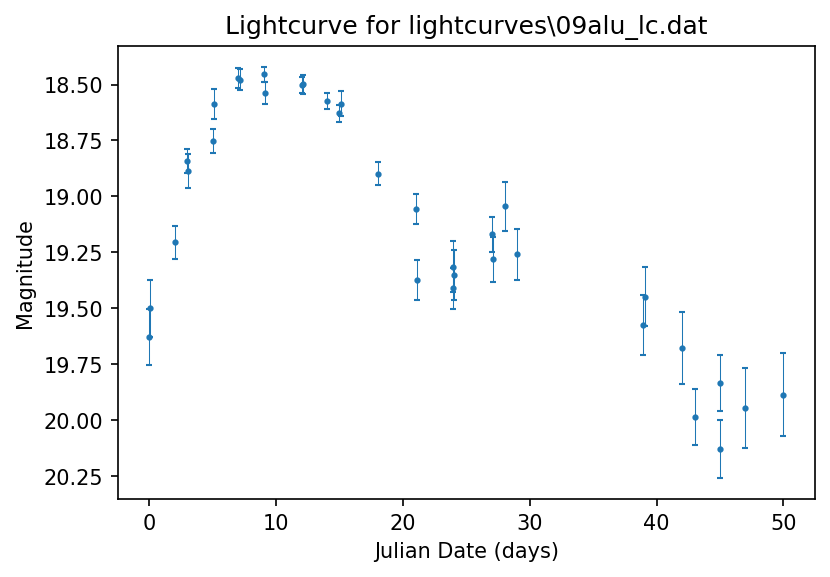

In [4]:
#create a single lightcurve with error bars
data = np.genfromtxt(filenames[0], skip_footer=1,usecols=(0,2,3))

plt.figure(dpi=150)

fig, ax = plt.subplots(dpi = 150)
time_values = data[:,0]
magnitudes = data[:,1]
magnitude_uncertainties = data[:,2]

x = time_values - time_values[0]
y = magnitudes
y_errors = magnitude_uncertainties

plt.errorbar(x,y, yerr = y_errors, marker = "o", linestyle="none", markersize = 2, capsize = 1.5, elinewidth = 0.5)
titletext = "Lightcurve for " + filenames[0]
plt.title(titletext)
plt.xlabel("Julian Date (days)")
plt.ylabel("Magnitude")
ax.invert_yaxis()

plt.show()


[ 0.740608  1.110912 21.107328 21.477632 21.847936 22.21824  22.588544
 22.958848 23.329152 24.06976  24.440064 31.47584  31.846144 32.216448
 32.586752 32.957056 33.32736  33.697664 34.067968]
rising: 0.9257599999955684
falling: 27.424278588104013
risetime: 8.13
falltime: 18.37


<Figure size 900x600 with 0 Axes>

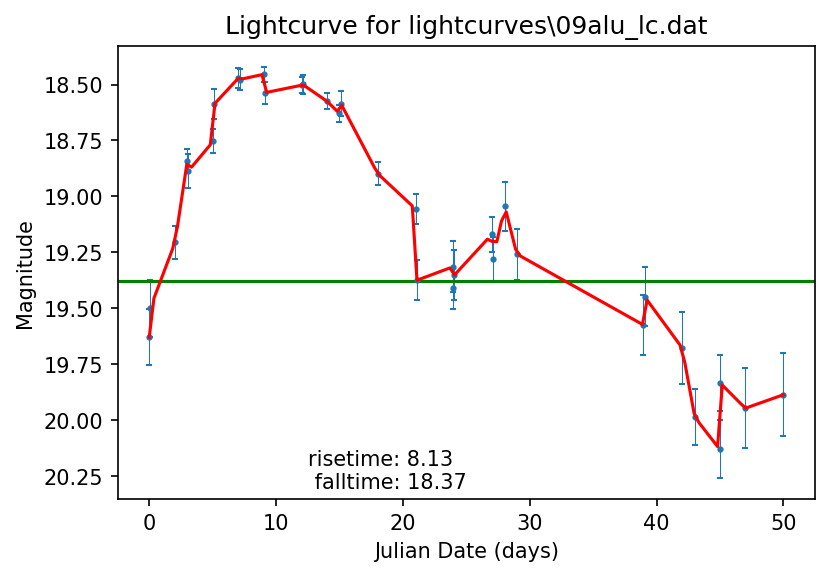

In [5]:
#create a single lightcurve with interpolation
data = np.genfromtxt(filenames[0], skip_footer=1,usecols=(0,2,3))

plt.figure(dpi=150)


# plot the data
fig, ax = plt.subplots(dpi = 150)
time_values = data[:,0]
magnitudes = data[:,1]
magnitude_uncertainties = data[:,2]

x = time_values - time_values[0]
y = magnitudes
y_errors = magnitude_uncertainties

plt.errorbar(x,y, yerr = y_errors, marker = "o", linestyle="none", markersize = 2, capsize = 1.5, elinewidth = 0.5)
titletext = "Lightcurve for " + filenames[0]
plt.title(titletext)
plt.xlabel("Julian Date (days)")
plt.ylabel("Magnitude")
ax.invert_yaxis()

# calculate and plot the interpolation
interp_xvals = np.linspace(0, np.max(x), np.size(x)*4)
interp_yvals = np.interp(interp_xvals, x, y)

plt.errorbar(interp_xvals, interp_yvals, color="r")

peak_magnitude = np.max(y)
max_index = np.argwhere(y == np.min(y))
half_brightness = peak_magnitude - 2.5 * np.log10(2)
# print(half_brightness)
plt.axhline(half_brightness, color="g")

good_xvals = np.array([])
for i, xval in enumerate(interp_xvals):
    if np.abs(interp_yvals[i] - half_brightness) < 0.05:
        good_xvals = np.append(good_xvals, xval)

print(good_xvals)

half_rising_JD = np.average(good_xvals[np.argwhere(good_xvals<max_index)[:,1]])
half_falling_JD = np.average(good_xvals[np.argwhere(good_xvals>max_index)[:,1]])

print(f"rising: {half_rising_JD}")
print(f"falling: {half_falling_JD}")

risetime = float(x[max_index]) - half_rising_JD
falltime = half_falling_JD - float(x[max_index])

risetime = round(risetime, 2)
falltime = round(falltime, 2)

print(f"risetime: {risetime}")
print(f"falltime: {falltime}")


textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax.text(np.max(x) / 4, np.max(y), textstr, verticalalignment = 'top')


plt.show()


In [6]:
good_xvals[np.argwhere(good_xvals>max_index)[:,1]]

array([21.107328, 21.477632, 21.847936, 22.21824 , 22.588544, 22.958848,
       23.329152, 24.06976 , 24.440064, 31.47584 , 31.846144, 32.216448,
       32.586752, 32.957056, 33.32736 , 33.697664, 34.067968])

In [7]:
testarr = np.array([])
testarr = np.append(testarr, 5)
testarr

array([5.])

In [8]:
np.argwhere(y == np.max(y))

array([[30]], dtype=int64)

In [9]:
np.max(y)

20.1299

1.8545054105457048


<Figure size 900x600 with 0 Axes>

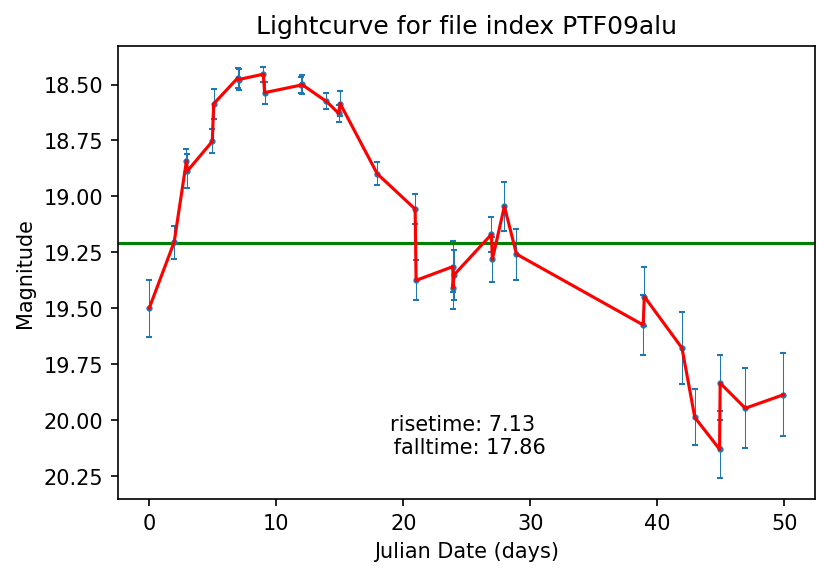

In [23]:
#create multiple lightcurves with interpolation between two file indices
start_index = 0
end_index = 0

indices = np.arange(start_index, end_index + 1, 1)

curr_index = start_index
for filename in filenames[start_index:end_index+1]:
    
    name1, name2 = form_transient_names(filename)
    data = np.genfromtxt(filename, skip_header=1, skip_footer=1,usecols=(0,2,3))

    # print(np.shape(data))
    # print(np.size(data))
    plt.figure(dpi=150)


    # plot the data
    fig, ax = plt.subplots(dpi = 150)
    time_values = data[:,0]
    magnitudes = data[:,1]
    magnitude_uncertainties = data[:,2]

    x = time_values - time_values[0]
    y = magnitudes
    y_errors = magnitude_uncertainties

    plt.errorbar(x,y, yerr = y_errors, marker = "o", linestyle="none", markersize = 2, capsize = 1.5, elinewidth = 0.5)
    titletext = f"Lightcurve for file index {name1}"
    plt.title(titletext)
    plt.xlabel("Julian Date (days)")
    plt.ylabel("Magnitude")
    ax.invert_yaxis()

    # calculate and plot the interpolation
    interp_xvals = np.linspace(0, np.max(x), 10000)
    interp_yvals = np.interp(interp_xvals, x, y)

    plt.errorbar(interp_xvals, interp_yvals, color="r")

    peak_magnitude = np.min(y)
    max_index = np.argwhere(y == np.min(y))
    max_index = max_index[0]            #this addition led to changing the slicing in half_rising_JD and falling
    half_brightness = peak_magnitude + 2.5 * np.log10(2)
    # print(half_brightness)
    plt.axhline(half_brightness, color="g")

    good_xvals = np.array([])
    for i, xval in enumerate(interp_xvals):
        if np.abs(interp_yvals[i] - half_brightness) < 0.05:
            good_xvals = np.append(good_xvals, xval)

    #print(good_xvals)

    half_rising_JD = np.average(good_xvals[np.argwhere(good_xvals<x[max_index])[:]])
    half_falling_JD = np.average(good_xvals[np.argwhere(good_xvals>x[max_index])[:]])

    print(half_rising_JD)
    # print(f"rising: {half_rising_JD}")
    # print(f"falling: {half_falling_JD}")

    risetime = float(x[max_index]) - half_rising_JD
    falltime = half_falling_JD - float(x[max_index])

    risetime = round(risetime, 2)
    falltime = round(falltime, 2)

    # print(f"risetime: {risetime}")
    # print(f"falltime: {falltime}")


    textstr = f'risetime: {risetime} \n falltime: {falltime}'
    ax.text(0.5, 0.1, textstr, ha='center', transform=ax.transAxes)




    plt.show()
    curr_index += 1


In [11]:
max_index

array([8], dtype=int64)

In [12]:
# Create a list of all object names, adding PTF and iPTF to them, then create a csv file with all the names
nameslist = []
for filename in filenames:
    name = filename
    name = name[12:-7]
    name = 'PTF' + name
    nameslist.append(name)
    name = 'i' + name
    nameslist.append(name)
    # print(name)

nameDict = {"names" : nameslist}
nameDataFrame = pd.DataFrame(nameDict)
print(nameDataFrame)

filepath = 'object_names.csv'
nameDataFrame.to_csv(filepath, columns=["names"], index=False)


         names
0     PTF09alu
1    iPTF09alu
2     PTF09aus
3    iPTF09aus
4     PTF09bad
..         ...
893   iPTF17wj
894    PTF17yw
895   iPTF17yw
896    PTF17zg
897   iPTF17zg

[898 rows x 1 columns]


In [13]:
#begin populating the dataframe that will have 
# col 1: transient name
# col 2: redshift (if exists)
# col 3: rise time
# col 4: fade time
# col 5: peak apparent magnitude
# col 6: peak absolute magnitude (converted with redshift)

transientDataFrame = pd.DataFrame(columns = ['name', 'z', 'rise time', 'fade time', 'peak apparent mag', 'peak absolute mag'],
                                    index = np.arange(len(nameslist)))

# transientDataFrame = transientDataFrame.append({
#                                                 'name' : 'blah',
#                                                 'z' : 5,
#                                                 'rise time' : 4,
#                                                 'fade time' : 18.5,
#                                                 'peak apparent mag' : 18.93,
#                                                 'peak absolute mag' : 11.2
#                                                 },
#                                                 ignore_index=True
# )

transientDataFrame.loc[:,'name'] = nameslist

transientDataFrame

,name,z,rise time,fade time,peak apparent mag,peak absolute mag
0,PTF09alu,NaN,NaN,NaN,NaN,NaN
1,iPTF09alu,NaN,NaN,NaN,NaN,NaN
2,PTF09aus,NaN,NaN,NaN,NaN,NaN
3,iPTF09aus,NaN,NaN,NaN,NaN,NaN
4,PTF09bad,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
893,iPTF17wj,NaN,NaN,NaN,NaN,NaN
894,PTF17yw,NaN,NaN,NaN,NaN,NaN
895,iPTF17yw,NaN,NaN,NaN,NaN,NaN
896,PTF17zg,NaN,NaN,NaN,NaN,NaN


In [14]:
########
## EDGE CASES
########
# some files where the peak brightness occurs twice (maybe 190?) remove max_index[0] to find
# some files where there is 'no data from...' at header OR footer, currently ignoring 1 line of header and footer, losing possible data
# giga tiny filesize, index 1 only has 2 lines

#begin populating the dataframe that will have 
# col 1: transient name
# col 2: redshift (if exists)
# col 3: rise time
# col 4: fade time
# col 5: peak apparent magnitude
# col 6: peak absolute magnitude (converted with redshift)

#Version 2

#get the files
image_location = r"lightcurves\*"
filenames = sorted(glob.glob(image_location))

#create the database to be filled
transientDataFrame = pd.DataFrame(columns = ['name', 'z', 'rise time', 'fade time', 'peak apparent mag', 'peak absolute mag'])


for i, filename in enumerate(filenames):
    print(i)
    # Get the info
    name_PTF, name_iPTF = form_transient_names(filename)
    risetime, fadetime = analyze_lightcurve(filename, plot=False)
    
    # populate the DB, once for each possible name
    transientDataFrame = transientDataFrame.append({
                                                'name' : name_PTF,
                                                'z' : np.nan,
                                                'rise time' : risetime,
                                                'fade time' : fadetime,
                                                'peak apparent mag' : np.nan,
                                                'peak absolute mag' : np.nan
                                                },
                                                ignore_index=True
    )

    transientDataFrame = transientDataFrame.append({
                                                'name' : name_iPTF,
                                                'z' : np.nan,
                                                'rise time' : risetime,
                                                'fade time' : fadetime,
                                                'peak apparent mag' : np.nan,
                                                'peak absolute mag' : np.nan
                                                },
                                                ignore_index=True
    )





0
1
2
3
4
5
6
7


c:\Users\wjhoh\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\Users\wjhoh\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
28

In [15]:
print(transientDataFrame.to_string())

           name   z  rise time  fade time  peak apparent mag  peak absolute mag
0      PTF09alu NaN       7.13      17.86                NaN                NaN
1     iPTF09alu NaN       7.13      17.86                NaN                NaN
2      PTF09aus NaN      -1.00      -1.00                NaN                NaN
3     iPTF09aus NaN      -1.00      -1.00                NaN                NaN
4      PTF09bad NaN        NaN        NaN                NaN                NaN
5     iPTF09bad NaN        NaN        NaN                NaN                NaN
6       PTF09bw NaN      -1.00      -1.00                NaN                NaN
7      iPTF09bw NaN      -1.00      -1.00                NaN                NaN
8      PTF09dfk NaN      78.43      62.50                NaN                NaN
9     iPTF09dfk NaN      78.43      62.50                NaN                NaN
10     PTF09dih NaN        NaN      15.00                NaN                NaN
11    iPTF09dih NaN        NaN      15.0

In [16]:
##################
##################
##################
##################
##################
# Beyond this point is testing and irrelevant
##################
##################
##################
##################
##################


In [17]:
df = pd.read_csv(filepath)
print(df)

         names
0     PTF09alu
1    iPTF09alu
2     PTF09aus
3    iPTF09aus
4     PTF09bad
..         ...
893   iPTF17wj
894    PTF17yw
895   iPTF17yw
896    PTF17zg
897   iPTF17zg

[898 rows x 1 columns]


In [18]:
name = filenames[0]
name[12:-7]

'09alu'

In [19]:
start_index = 50
end_index = 55
nameslist = []
for i in np.arange(start_index, end_index):
    name = filenames[i]
    name = name[12:-7]
    name = 'PTF' + name
    nameslist.append(name)
    name = 'i' + name
    nameslist.append(name)
    print(name)

iPTF10duy
iPTF10fej
iPTF10fhk
iPTF10fjh
iPTF10fk


In [20]:
nameslist

['PTF10duy',
 'iPTF10duy',
 'PTF10fej',
 'iPTF10fej',
 'PTF10fhk',
 'iPTF10fhk',
 'PTF10fjh',
 'iPTF10fjh',
 'PTF10fk',
 'iPTF10fk']

In [21]:
type(np.nan)

float